# Reduction of Dimensionality
## First Ideas

This notebook is not expected to be a very deep and detailed explanation, as it was constructed to be part of a set of discussions on Machine Learning.

---

The problem to be solved is basically select the main features of a dataset, but in particular these features can be seen as linear combinations so that we make sure we do not have redundant information.

If there are two columns strongly correlated, using them both is equivalent to _saying_ this feature is more important than the others even if it is not the case. So to solve that issue, we may explore the data and then select only a few features so that it is enough for the model to learn what we want.

d
Here we are going to introduce lots of concepts that have been previously mentioned and one of the most popular data sources for machine learning projects.

First, let us import the libraries we need for the data exploration and plotting.
> The only new is `Seaborn` and it is also used to plot things, and can be integrated with `matplotlib` axes and figures as will be shown here.

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

We are going to use data from the UC Irvine Machine Learning Repository [link](https://archive.ics.uci.edu/ml/index.php) which is a great source of data to learn how to apply Machine Learning algorithms.

We are going to use the `wine` dataset [link](https://archive.ics.uci.edu/ml/datasets/Wine).

The description provided from the webpage is



    Data Set Information:

    These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

    The attributes are (donated by Riccardo Leardi, riclea@anchem.unige.it )
        1) Alcohol
        2) Malic acid
        3) Ash
        4) Alcalinity of ash
        5) Magnesium
        6) Total phenols
        7) Flavanoids
        8) Nonflavanoid phenols
        9) Proanthocyanins
        10)Color intensity
        11)Hue
        12)OD280/OD315 of diluted wines
        13)Proline

    In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging.



So we basically are going to construct a classifier based on these 13 properties to finally get the specific place the wine came.

the data can be found at,

In [2]:
dataset_link="https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

for start, just let us import the data into a dataframe,

In [3]:
data=pd.read_csv(dataset_link,header=None)

The data looks like this.

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Let us write the list of the names from the description,

In [5]:
names=["Class",'Alcohol',"Malic acid","Ash","Alcalinity of ash",
       'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
       'Proanthocyanins','Color intensity',
       'Hue','OD280/OD315 of diluted wines','Proline']

So, we can just use this list as the names of the columns of the dataframe

In [6]:
data.columns=names

So now the dataframe can be read way easier,

In [7]:
data

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


It is worthy to see if any of the previous characteristics can help us to distinguish the class which is the target of our classification, so if we plot, for instance the `Class` as a function of the `Alcohol` variable we may get,

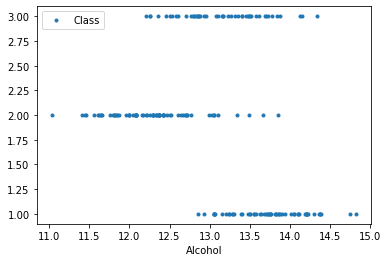

In [8]:
data.plot(x='Alcohol',y="Class",style='.')

There we see some overlapping, so it is not a _perfect_ way to distinguish between the three classes, but maybe between the first and the second, as less points seem to be overlapping, nevertheless, this representation is in fact very poor, so let us use `seaborn` to get a better way to represent this, which is a _violin plot_, which is useful because shows us the density in the same plot,

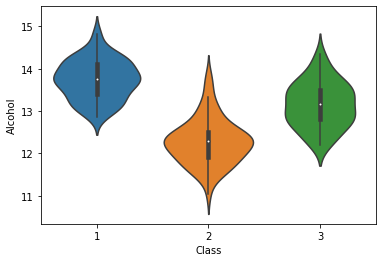

In [9]:
sns.violinplot(x="Class", y="Alcohol", data=data)

there we confirm that, even not in the best way, this variable could help us to distinguish between the one and two classes, let us do it for the rest of variables,

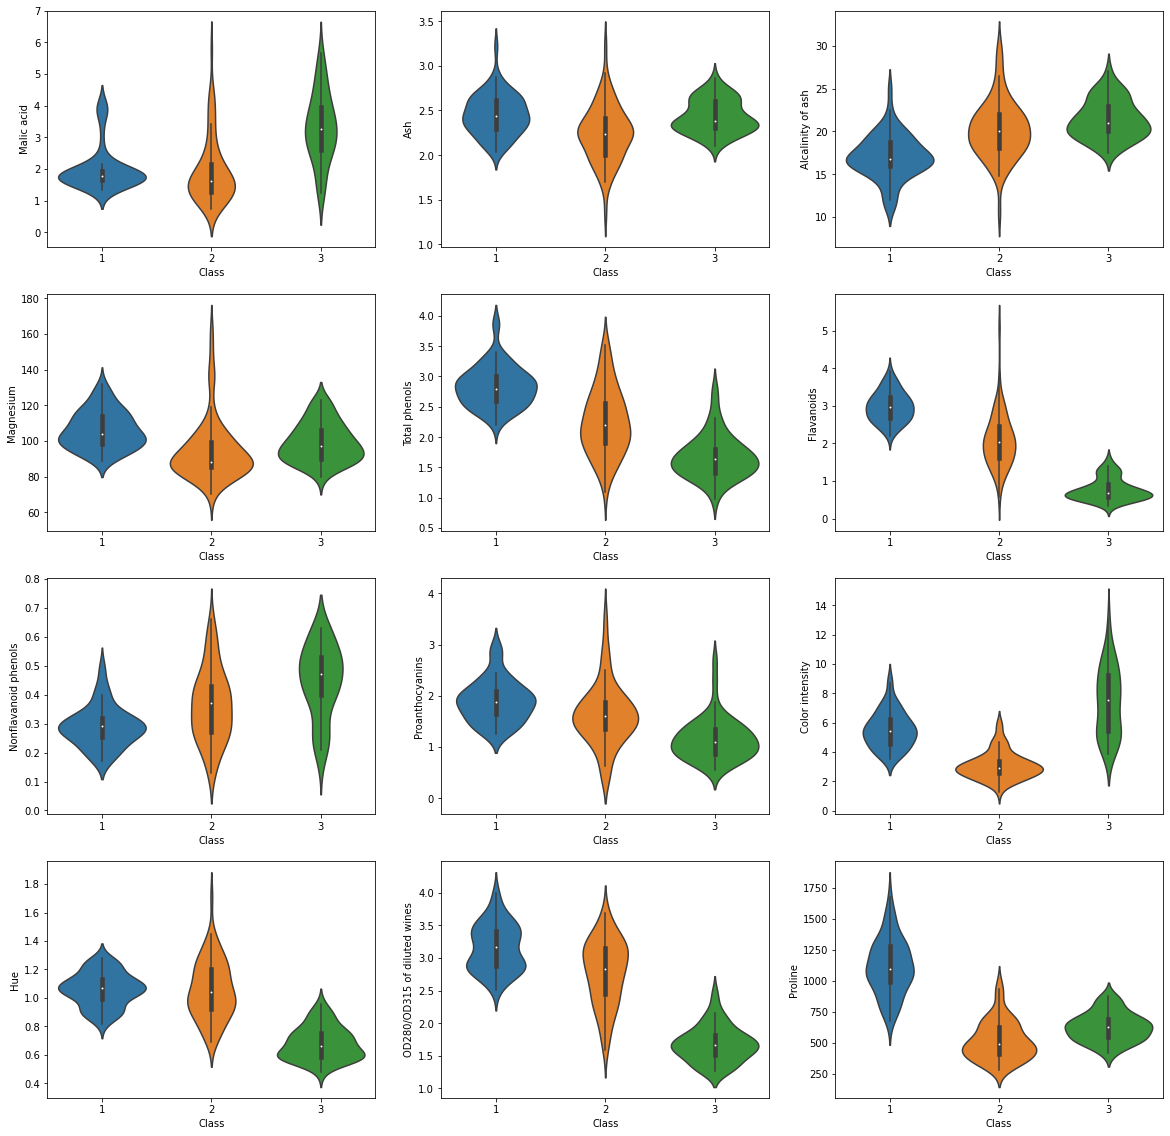

In [10]:
fig=plt.figure(figsize=(20,20))
k=1
for j,i in enumerate(data.columns[2:]):
    ax1=fig.add_subplot(4,3,j+1)
    sns.violinplot(x="Class", y=i, data=data,ax=ax1)
plt.show()

Some ideas may help, but there is no a single variable that is enough to separate the three classes properly.

So let us make couples, the following plot shows all the possible combinations, and overlappings just presented, again, the color represents the class variable.

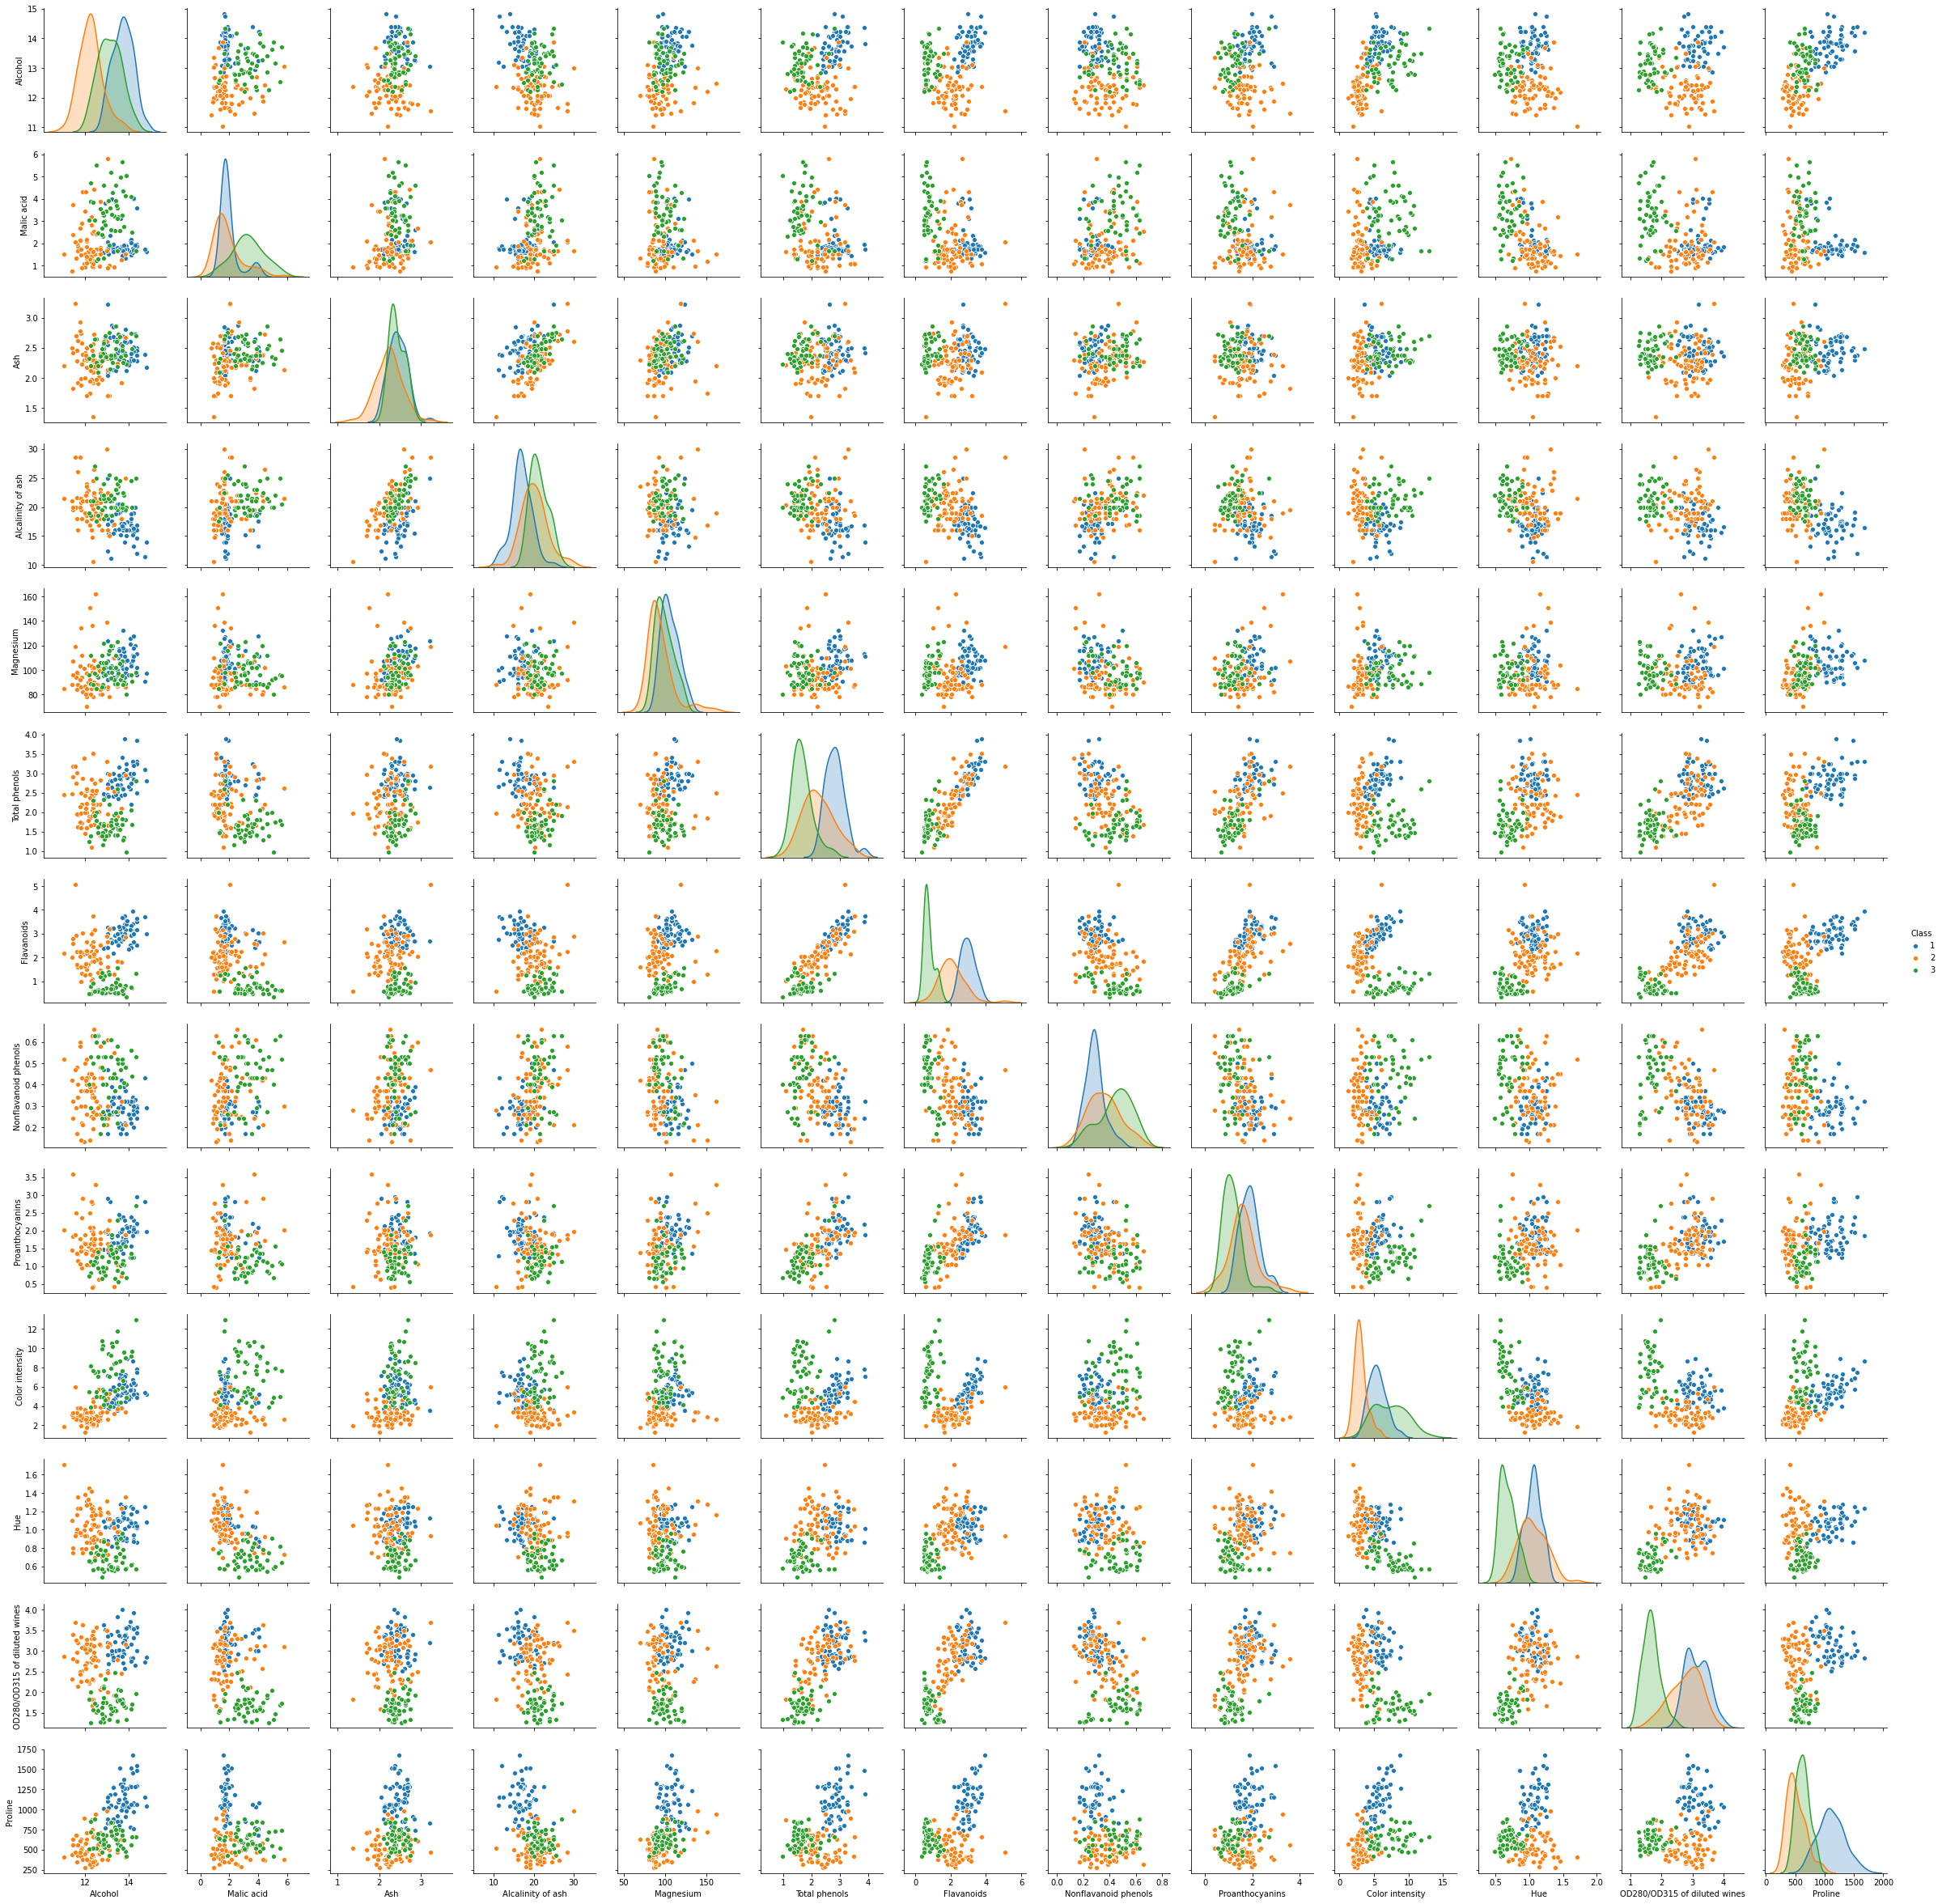

In [11]:
sns.pairplot(data,hue='Class')
plt.show()

There you can see better that there are some pairs which would work good to do the classification correctly, with a reasonable _error_ , but let us construct a better classifier.

Let us separate our data in the target and features

In [12]:
y=data.Class.values
X=data.iloc[:,1:].values

Then, separate them in training and test sets,

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

As it has been discussed before, as the variables can come from many different things, sources and reasons, the typical values can also differ and therefore, sometimes those with higher values seem to be _more important_ than others even if that is not the case. To solve this issue, we can scale our data to have mean $\mu=0$ and standard deviation $\sigma=1$, this is done via `sklearn` with the `sklearn.preprocessing.StandardScaler` object,

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

We use the fit for the training set, and use these values to the test, as we are not supposed to know the test set beforehand

In [15]:
X_train[0]

array([1.267e+01, 9.800e-01, 2.240e+00, 1.800e+01, 9.900e+01, 2.200e+00,
       1.940e+00, 3.000e-01, 1.460e+00, 2.620e+00, 1.230e+00, 3.160e+00,
       4.500e+02])

In [16]:
X_train_sc[0]

array([-0.42910167, -1.2453582 , -0.46250867, -0.39995575, -0.04586417,
       -0.1970027 , -0.12726288, -0.49824252, -0.18692758, -1.05072659,
        1.20879343,  0.75431192, -0.94701455])

Now, let us construct the covariance matrix to calculate the correlations among the columns, then we calculate the eigenvalues and eigenvectors which will indicate some _directions_ that we are going to call _principal components_ such that, a larger eigen value means that the direction given by the correspondent eigenvector is _more important_

In [17]:
cov_mat=np.cov(X_train_sc.T)

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print(eigen_vals)

[4.73335969 2.3557885  1.56030892 1.1263352  0.82210954 0.63233616
 0.51074897 0.10509404 0.35577936 0.28954832 0.16467027 0.23366853
 0.21594357]


One quantity that can be seen very straightforward is the  Explained variance that is construct a vector with all the eigenvalues and normalizing it,

In [18]:
tot=np.sum(eigen_vals)

In [19]:
var_exp=sorted(eigen_vals)/tot

<BarContainer object of 13 artists>

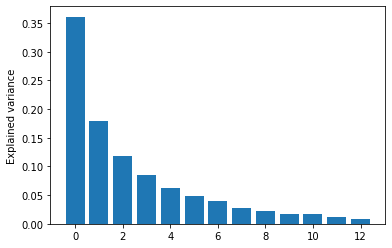

In [20]:
plt.ylabel('Explained variance')
plt.bar(range(len(var_exp)),var_exp[::-1])

We do this, because we would like to compare with the library latter on

In [21]:
eigen_vals

array([4.73335969, 2.3557885 , 1.56030892, 1.1263352 , 0.82210954,
       0.63233616, 0.51074897, 0.10509404, 0.35577936, 0.28954832,
       0.16467027, 0.23366853, 0.21594357])

Let us select only two eigenvectors, (the two firsts principal components) 

In [22]:
w=eigen_vecs[:,:2]
w

array([[-0.23799172, -0.41633861],
       [ 0.19948632, -0.21939389],
       [-0.06596666, -0.34288693],
       [ 0.21071532, -0.02904901],
       [-0.19414924, -0.29090991],
       [-0.40111142, -0.0144589 ],
       [-0.4197559 ,  0.06637629],
       [ 0.27540964, -0.10707091],
       [-0.3072972 , -0.01302999],
       [-0.00154789, -0.56751562],
       [-0.26762978,  0.31585933],
       [-0.35525705,  0.24974868],
       [-0.33453786, -0.2738983 ]])

And let us transform our data using these directions as weights.

In [23]:
X_train_pca=X_train_sc.dot(w)

So now, we only have two dimensions to distinguish our data, so if we plot them

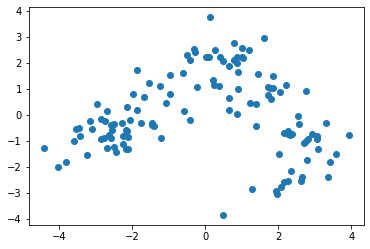

In [24]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,1])

You can see some structure, but as this is the training data, we can also plot with different colors each of the classes 

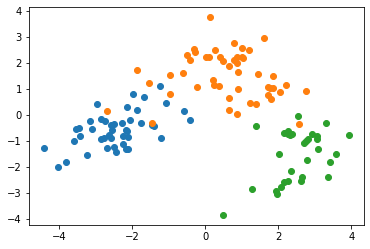

In [25]:
for i in range(1,4):
    X=X_train_pca[y_train==i]
    plt.scatter(X[:,0],X[:,1])

And now it is possible to visualize how the model is going to separate the classes with just straight lines.

All this procedure can be done just with a few lines using `sklearn`, so let us give it a try,

In [26]:
from sklearn.decomposition import PCA

We define our PCA object and the fit the _standarized_ data,

In [27]:
pca=PCA()

X_train_pca=pca.fit_transform(X_train_sc)

The plot of the explained variance can be get easily just by using,

<BarContainer object of 13 artists>

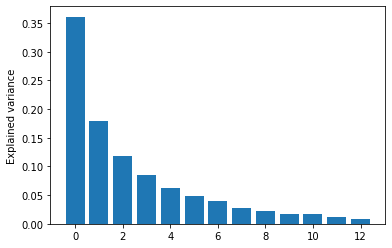

In [28]:
plt.ylabel('Explained variance')
plt.bar(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)

So, now let us restrict ourselves to the case of two principal components, 

In [29]:
pca=PCA(n_components=2)

X_train_pca =pca.fit_transform(X_train_sc)
X_test_pca =pca.transform(X_test_sc)

So the result for our training set goes as,

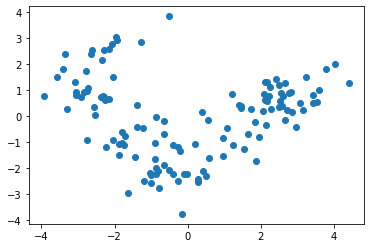

In [30]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,1])

And for the test set

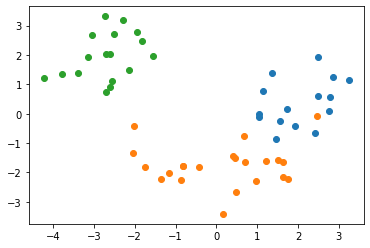

In [31]:
for i in range(1,4):
    X=X_test_pca[y_test==i]
    plt.scatter(X[:,0],X[:,1])

So now, let us just use a Support Vector Machine to classify as we have already done in other examples

In [32]:
from sklearn.svm import SVC

In [33]:
model=SVC()
model.fit(X_train_pca,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

So, our predictions go as,

In [34]:
y_pred=model.predict(X_test_pca)

In [35]:
from sklearn.metrics import plot_confusion_matrix

In such a way that the resultant confusion matrix shows the small error we have got,

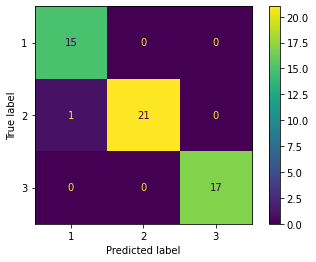

In [36]:
plot_confusion_matrix(model,X_test_pca,y_test)

The real data 

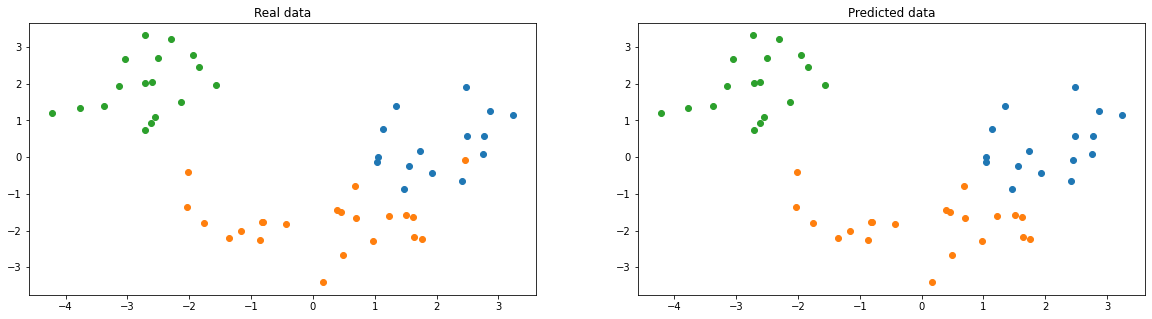

In [37]:
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.set_title('Real data')
ax2.set_title('Predicted data')
for i in range(1,4):
    X1=X_test_pca[y_test==i]
    ax1.scatter(X1[:,0],X1[:,1])
    X2=X_test_pca[y_pred==i]
    ax2.scatter(X2[:,0],X2[:,1])